# 2 Investigating Momentum

In [1]:
# import everything
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

# references:
# HW4 Solutions posted on Canvas

# References:
### Last year's HW4 Solutions posted on Canvas and Friday presentation

In this section, we empirically investigate some concerns regarding AQR’s new momentum product.

On Canvas, find the data file, “momentum data.xlsx”.

• The first tab contains the momentum factor as an excess return: ˜r
mom.

• The second tab contains returns on portfolios corresponding to scored momentum deciles.

– r
mom(1) denotes the portfolio of stocks in the lowest momentum decile, the “losers” with the
lowest past returns.

– r
mom(10) denotes the portfolio of stocks in the highest momentum decile.

• The third tab gives portfolios sorted by momentum and size.

– r
momSU denotes the portfolio of small stocks in the top 3 deciles of momentum scores.

– r^{momBD} denotes the portfolio of big-stocks in the bottom 3 deciles of momentum scores.

Note that the Fama-French momentum return, ˜r
mom:FF, given in the first tab, is constructed by FF as,

$$ \tilde{r}^{mom:FF} = \frac{1}{2}\left(r^{momBU} + r^{momSU}\right) - \frac{1}{2}\left(r^{momBD} + r^{momSD}\right) $$

In [2]:
risk_free = pd.read_excel(r'/Users/peterfeng/Downloads/积累/Previous Courses Materials/UChicago Past Courses/UChicago 2021 Fall/Portfolio Theory/hw data/momentum_data-2.xlsx',sheet_name=5,index_col='Date',parse_dates=['Date'])
risk_free

,RF
Date,
1927-01-31,0.0025
1927-02-28,0.0026
1927-03-31,0.0030
1927-04-30,0.0025
1927-05-31,0.0030
...,...
2021-05-31,0.0000
2021-06-30,0.0000
2021-07-31,0.0000


In [3]:
UMD_returns  = pd.read_excel(r'/Users/peterfeng/Downloads/积累/Previous Courses Materials/UChicago Past Courses/UChicago 2021 Fall/Portfolio Theory/hw data/momentum_data-2.xlsx',sheet_name=2,index_col='Date',parse_dates=['Date'])
UMD_returns

,UMD
Date,
1927-01-31,0.0036
1927-02-28,-0.0214
1927-03-31,0.0361
1927-04-30,0.0430
1927-05-31,0.0300
...,...
2021-05-31,0.0088
2021-06-30,0.0224
2021-07-31,-0.0229


In [4]:
ff_factors = pd.read_excel(r'/Users/peterfeng/Downloads/积累/Previous Courses Materials/UChicago Past Courses/UChicago 2021 Fall/Portfolio Theory/hw data/momentum_data-2.xlsx',sheet_name=1,index_col='Date',parse_dates=['Date'])
ff_factors

,MKT,SMB,HML
Date,,,
1927-01-31,-0.0006,-0.0051,0.0473
1927-02-28,0.0418,-0.0025,0.0327
1927-03-31,0.0013,-0.0189,-0.0256
1927-04-30,0.0046,0.0049,0.0071
1927-05-31,0.0544,0.0146,0.0498
...,...,...,...
2021-05-31,0.0029,-0.0028,0.0704
2021-06-30,0.0275,0.0180,-0.0776
2021-07-31,0.0127,-0.0396,-0.0175


In [5]:
# MUST CORRECT FOR RISK FREE RATE SINCE THESE ARE TOTAL RETURNS
momentum_deciles = pd.read_excel(r'/Users/peterfeng/Downloads/积累/Previous Courses Materials/UChicago Past Courses/UChicago 2021 Fall/Portfolio Theory/hw data/momentum_data-2.xlsx',sheet_name=3,index_col='Date',parse_dates=['Date'])
momentum_deciles
# momentum_deciles['rf'] = risk_free # converting to excess returns
# for column in momentum_deciles.columns:
#     momentum_deciles[column] = momentum_deciles[column] - momentum_deciles['rf']
# momentum_deciles.drop('rf',axis=1,inplace=True)
momentum_deciles

,Lo PRIOR,PRIOR 2,PRIOR 3,PRIOR 4,PRIOR 5,PRIOR 6,PRIOR 7,PRIOR 8,PRIOR 9,Hi PRIOR
Date,,,,,,,,,,
1927-01-31,-0.0332,-0.0446,0.0269,-0.0033,-0.0041,0.0097,0.0074,0.0036,-0.0041,-0.0024
1927-02-28,0.0753,0.0593,0.0825,0.0727,0.0322,0.0421,0.0283,0.0326,0.0420,0.0701
1927-03-31,-0.0323,-0.0301,-0.0392,-0.0477,-0.0048,-0.0242,0.0205,0.0041,0.0096,0.0547
1927-04-30,0.0204,-0.0320,-0.0247,-0.0137,0.0220,-0.0005,0.0205,-0.0059,0.0159,0.0549
1927-05-31,0.0272,0.0457,0.0595,0.0318,0.0636,0.0580,0.0496,0.0681,0.0811,0.0632
...,...,...,...,...,...,...,...,...,...,...
2021-05-31,-0.0004,0.0149,-0.0132,0.0141,0.0181,-0.0033,0.0203,0.0217,0.0190,-0.0478
2021-06-30,0.0231,0.0050,0.0168,0.0498,-0.0052,0.0434,0.0153,-0.0082,0.0218,0.0894
2021-07-31,-0.0031,0.0171,0.0341,0.0327,0.0155,0.0217,-0.0124,-0.0094,-0.0205,-0.0047


In [6]:
# MUST CORRECT FOR RISK FREE RATE SINCE THESE ARE TOTAL RETURNS
momentum_size = pd.read_excel(r'/Users/peterfeng/Downloads/积累/Previous Courses Materials/UChicago Past Courses/UChicago 2021 Fall/Portfolio Theory/hw data/momentum_data-2.xlsx',sheet_name=4,index_col='Date',parse_dates=['Date'])
momentum_size

# momentum_size['rf'] = risk_free # converting to excess returns

# for column in momentum_size.columns:
#     momentum_size[column] = momentum_size[column] - momentum_size['rf']
# momentum_size.drop('rf',axis=1,inplace=True)
momentum_size

,SMALL LoPRIOR,ME1 PRIOR2,SMALL HiPRIOR,BIG LoPRIOR,ME2 PRIOR2,BIG HiPRIOR
Date,,,,,,
1927-01-31,0.0008,0.0357,0.0040,-0.0040,0.0026,0.0000
1927-02-28,0.0701,0.0648,0.0551,0.0727,0.0380,0.0447
1927-03-31,-0.0346,-0.0288,-0.0206,-0.0357,-0.0018,0.0226
1927-04-30,-0.0075,-0.0048,0.0332,-0.0272,0.0075,0.0181
1927-05-31,0.0248,0.1115,0.0683,0.0552,0.0496,0.0718
...,...,...,...,...,...,...
2021-05-31,-0.0020,0.0171,0.0236,-0.0021,0.0103,-0.0101
2021-06-30,0.0195,-0.0007,0.0444,0.0131,0.0346,0.0330
2021-07-31,-0.0342,-0.0232,-0.0529,0.0226,0.0214,-0.0045


## 1. Is momentum still profitable?

The excess returns of lucrative trading strategies often disappear once the strategy is well-known.
The first widely-cited paper on momentum was published in 1993. Have momentum returns or
risk changed since then? The AQR case takes place at the end of 2008. Have momentum returns
changed in 2009-2021?

Investigate by filling out the summary statistics below for the full-sample and three sub-samples.


### (a) Using the data provided, fill in Table 1 with the appropriate stats for ˜rmom:FF.


In [7]:
table_1 = pd.DataFrame(columns=['mean','vol','Sharpe','skewness','corr to rm','corr to rv'],index=['1927-2021','1927-1993',
                                                                                                  '1994-2008',
                                                                                                  '2009-2021'])
table_1
# 1927-2021


table_1.loc['1927-2021','mean'] = UMD_returns['UMD'].mean() * 12
table_1.loc['1927-1993','mean'] = UMD_returns['UMD'][:'1993'].mean() * 12
table_1.loc['1994-2008','mean'] = UMD_returns['UMD']['1994':'2008'].mean() * 12
table_1.loc['2009-2021','mean'] = UMD_returns['UMD']['2009':'2021'].mean() * 12


table_1.loc['1927-2021','vol'] = UMD_returns['UMD'].std() * math.sqrt(12)
table_1.loc['1927-1993','vol'] = UMD_returns['UMD'][:'1993'].std() * math.sqrt(12)
table_1.loc['1994-2008','vol'] = UMD_returns['UMD']['1994':'2008'].std() * math.sqrt(12)
table_1.loc['2009-2021','vol'] = UMD_returns['UMD']['2009':'2021'].std() * math.sqrt(12)

table_1['Sharpe'] = table_1['mean'] / table_1['vol']

table_1.loc['1927-2021','skewness'] = UMD_returns['UMD'].skew()
table_1.loc['1927-1993','skewness'] = UMD_returns['UMD'][:'1993'].skew()
table_1.loc['1994-2008','skewness'] = UMD_returns['UMD']['1994':'2008'].skew()
table_1.loc['2009-2021','skewness'] = UMD_returns['UMD']['2009':'2021'].skew()

UMD_returns['UMD']

table_1.loc['1927-2021','corr to rm'] = UMD_returns['UMD'].corr(ff_factors['MKT'])
table_1.loc['1927-1993','corr to rm'] = UMD_returns['UMD'][:'1993'].corr(ff_factors['MKT'][:'1993'])
table_1.loc['1994-2008','corr to rm'] = UMD_returns['UMD']['1994':'2008'].corr(ff_factors['MKT']['1994':'2008'])
table_1.loc['2009-2021','corr to rm'] = UMD_returns['UMD']['2009':'2021'].corr(ff_factors['MKT']['2009':'2021'])

table_1.loc['1927-2021','corr to rv'] = UMD_returns['UMD'].corr(ff_factors['HML'])
table_1.loc['1927-1993','corr to rv'] = UMD_returns['UMD'][:'1993'].corr(ff_factors['HML'][:'1993'])
table_1.loc['1994-2008','corr to rv'] = UMD_returns['UMD']['1994':'2008'].corr(ff_factors['HML']['1994':'2008'])
table_1.loc['2009-2021','corr to rv'] = UMD_returns['UMD']['2009':'2021'].corr(ff_factors['HML']['2009':'2021'])

table_1.style.set_caption('Table 1: Momentum performance over time.')

,mean,vol,Sharpe,skewness,corr to rm,corr to rv
1927-2021,0.076753,0.163286,0.470050,-3.007700,-0.344836,-0.424382
1927-1993,0.090199,0.160002,0.563734,-3.808223,-0.362323,-0.496074
1994-2008,0.104293,0.175561,0.594059,-0.580950,-0.234510,-0.130006
2009-2021,-0.026306,0.163335,-0.161054,-2.757832,-0.379901,-0.448611


### (b) Has momentum changed much over time, as seen through these subsample statistics?

Momentum's performance has been fairly consistent over the entire sample except that in the past 12 years the mean return has been very poor. This is driven mostly by the year 2009. Note that even in the final subsample the correlations to the market and value are close to their usual values, and the overall volatility is close to the usual.

It's also noticeable that in the subperiod 1994-2008, the momentum has the best performance. The sharpe ratio is the highest, and the sknewness is only slightly negative. The correlations to the market and the value factor are the lowest. And this is exactly the period that momentum was published and well-practiced.

### (c) Does this data support AQR’s argument that momentum is an important piece of the idealportfolio? What if mean returns to momentum are in actuality near zero due to transactioncosts—would there still be evidence here that momentum is valuable?

The persistent performance over time (except for the 2009 crash which causes low mean return in 2009-2020) seems to support the idea that momentum is not just a statistical anomaly. Even in the final subsample, it gives negative correlation to the market and value to the point it is valuable to a mean-variance investor even with a mean return near zero.

## 2. The case is about whether a long-only implementation of momentum is valuable. Construct your own long-only implementation:1 ,


Note that this is following the FF approach of treating big and small stocks separately. This
would be very similar to a scaled version of,

For the question below, use the FF-style, ˜rmomU:FFt.

### (a) Fill out Table 2 for the data in the period 1994-2021.

In [8]:
momentum_size

,SMALL LoPRIOR,ME1 PRIOR2,SMALL HiPRIOR,BIG LoPRIOR,ME2 PRIOR2,BIG HiPRIOR
Date,,,,,,
1927-01-31,0.0008,0.0357,0.0040,-0.0040,0.0026,0.0000
1927-02-28,0.0701,0.0648,0.0551,0.0727,0.0380,0.0447
1927-03-31,-0.0346,-0.0288,-0.0206,-0.0357,-0.0018,0.0226
1927-04-30,-0.0075,-0.0048,0.0332,-0.0272,0.0075,0.0181
1927-05-31,0.0248,0.1115,0.0683,0.0552,0.0496,0.0718
...,...,...,...,...,...,...
2021-05-31,-0.0020,0.0171,0.0236,-0.0021,0.0103,-0.0101
2021-06-30,0.0195,-0.0007,0.0444,0.0131,0.0346,0.0330
2021-07-31,-0.0342,-0.0232,-0.0529,0.0226,0.0214,-0.0045


In [9]:
long_momentum = pd.DataFrame(index=momentum_size.index)
long_momentum['ff mom'] = 1/2 * momentum_size['BIG HiPRIOR'] + .5 * momentum_size['SMALL HiPRIOR'] - risk_free['RF']

long_momentum 

,ff mom
Date,
1927-01-31,-0.00050
1927-02-28,0.04730
1927-03-31,-0.00200
1927-04-30,0.02315
1927-05-31,0.06705
...,...
2021-05-31,0.00675
2021-06-30,0.03870
2021-07-31,-0.02870


In [10]:
table_2 = pd.DataFrame(columns=['mean','vol','Sharpe','skewness','corr to rm','corr to rv'],index=['Long and short','Long only'])
table_2 

table_2.loc['Long and short','mean'] = UMD_returns['UMD']['1994':].mean() * 12
table_2.loc['Long only','mean'] = long_momentum['ff mom']['1994':].mean() * 12


table_2.loc['Long and short','vol'] = UMD_returns['UMD']['1994':].std() * math.sqrt(12)
table_2.loc['Long only','vol'] = long_momentum['ff mom']['1994':].std() * math.sqrt(12)


table_2['Sharpe'] = table_2['mean'] / table_2['vol']

table_2.loc['Long and short','skewness'] = UMD_returns['UMD']['1994':].skew()
table_2.loc['Long only','skewness'] = long_momentum['ff mom']['1994':].skew()


table_2.loc['Long and short','corr to rm'] = UMD_returns['UMD']['1994':].corr(ff_factors['MKT']['1994':])
table_2.loc['Long only','corr to rm'] = long_momentum['ff mom']['1994':].corr(ff_factors['MKT']['1994':])


table_2.loc['Long and short','corr to rv'] = UMD_returns['UMD']['1994':].corr(ff_factors['HML']['1994':])
table_2.loc['Long only','corr to rv'] = long_momentum['ff mom']['1994':].corr(ff_factors['HML']['1994':])

table_2.style.set_caption('Table 2: Long-only momentum performance.')

,mean,vol,Sharpe,skewness,corr to rm,corr to rv
Long and short,0.044288,0.170839,0.259240,-1.410431,-0.306545,-0.254327
Long only,0.123663,0.177186,0.697928,-0.501869,0.900198,-0.137376


### (b) Is long-only momentum as attractive as long-short momentum with respect to mean, volatility, and Sharpe Ratio?


The long only portfolio has a better mean, and  better Sharpe, with comparable volatility. However, this is only looking at the singular metrics and not how they would be in a portfolio with other factors.

### (c) Is long-only momentum as diversifying as long-short momentum with respect to market and value premia?

The long-only strategy is extremely correlated with the market and thus should not be promoted based on its diversification to the market. The long-short strategy has almost no market correlation and substantially negative correlation to value.

### (d) Show a plot of the cumulative product of 1 + ˜r mom:FF and 1 + ˜r momU:FF over the 1994-2021 subsample.

In [11]:
momentum_cumprod = pd.DataFrame(index=UMD_returns['1994':].index)
momentum_cumprod['UMD'] = (1 + UMD_returns['1994':]).cumprod()
momentum_cumprod['Long only'] = (1 + long_momentum['ff mom']['1994':]).cumprod()
momentum_cumprod

,UMD,Long only
Date,,
1994-01-31,1.000000,1.032800
1994-02-28,0.997000,1.012970
1994-03-31,0.984338,0.953357
1994-04-30,0.988177,0.952404
1994-05-31,0.966536,0.938165
...,...,...
2021-05-31,2.138928,19.255689
2021-06-30,2.186840,20.000884
2021-07-31,2.136761,19.426858


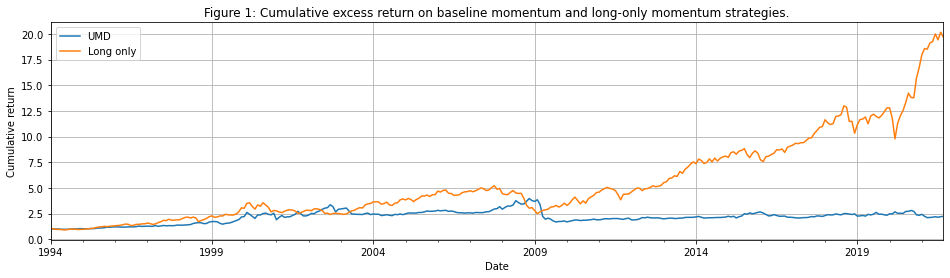

In [12]:
momentum_cumprod.plot(figsize=(16,4))
plt.grid()
plt.title('Figure 1: Cumulative excess return on baseline momentum and long-only momentum strategies.')
plt.ylabel('Cumulative return')
plt.legend()

From 1994 to 2021, the long-and-short momentum stratery only out-performed the long-only strategy in 2003 and 2009. There one sees that the long-and-short momentum strategy suffered massive losses in 2009, (roughly -80% return,) while the long-only strategy was down about 50% in 2008 and up in 2009. This is a good illustration of the long-only strategy having less skewness. After 2009, the performance of long-and-short stratery was quite stable, and it has never returned to the previous level. On the other hand, the long-only strategy has recovered and soared after 2009.

## 3. Is momentum just data mining, or is it a robust strategy?

Assess how sensitive the threshold for the “winners” and “losers” is in the results. Specifically,
we compare three constructions:
    
• long the top 1 decile and short the bottom 1 deciles


In [13]:
momentum_deciles

,Lo PRIOR,PRIOR 2,PRIOR 3,PRIOR 4,PRIOR 5,PRIOR 6,PRIOR 7,PRIOR 8,PRIOR 9,Hi PRIOR
Date,,,,,,,,,,
1927-01-31,-0.0332,-0.0446,0.0269,-0.0033,-0.0041,0.0097,0.0074,0.0036,-0.0041,-0.0024
1927-02-28,0.0753,0.0593,0.0825,0.0727,0.0322,0.0421,0.0283,0.0326,0.0420,0.0701
1927-03-31,-0.0323,-0.0301,-0.0392,-0.0477,-0.0048,-0.0242,0.0205,0.0041,0.0096,0.0547
1927-04-30,0.0204,-0.0320,-0.0247,-0.0137,0.0220,-0.0005,0.0205,-0.0059,0.0159,0.0549
1927-05-31,0.0272,0.0457,0.0595,0.0318,0.0636,0.0580,0.0496,0.0681,0.0811,0.0632
...,...,...,...,...,...,...,...,...,...,...
2021-05-31,-0.0004,0.0149,-0.0132,0.0141,0.0181,-0.0033,0.0203,0.0217,0.0190,-0.0478
2021-06-30,0.0231,0.0050,0.0168,0.0498,-0.0052,0.0434,0.0153,-0.0082,0.0218,0.0894
2021-07-31,-0.0031,0.0171,0.0341,0.0327,0.0155,0.0217,-0.0124,-0.0094,-0.0205,-0.0047


In [14]:
frame_3 = pd.DataFrame(index=momentum_deciles['1994':].index)
frame_3['D1'] = momentum_deciles['Hi PRIOR']['1994':] - momentum_deciles['Lo PRIOR']['1994':]

• long the top 3 deciles and short the bottom 3 deciles

In [15]:
frame_3['D3'] = 1/3 * (momentum_deciles['Hi PRIOR']['1994':]+momentum_deciles['PRIOR 9']['1994':]+momentum_deciles['PRIOR 8']['1994':]
                       - momentum_deciles['Lo PRIOR']['1994':]- momentum_deciles['PRIOR 2']['1994':]- momentum_deciles['PRIOR 3']['1994':])

• long the top 5 deciles and short the bottom 5 deciles

In [16]:
frame_3['D5'] = 1/5 * (momentum_deciles['Hi PRIOR']['1994':]+momentum_deciles['PRIOR 9']['1994':]+momentum_deciles['PRIOR 8']['1994':]+momentum_deciles['PRIOR 7']['1994':]+momentum_deciles['PRIOR 6']['1994':]
                       - momentum_deciles['Lo PRIOR']['1994':]- momentum_deciles['PRIOR 2']['1994':]- momentum_deciles['PRIOR 3']['1994':]- momentum_deciles['PRIOR 4']['1994':]- momentum_deciles['PRIOR 5']['1994':])

In [17]:
frame_3

,D1,D3,D5
Date,,,
1994-01-31,-0.0181,-0.006867,-0.00136
1994-02-28,0.0032,-0.001667,0.00026
1994-03-31,-0.0058,-0.006900,-0.00784
1994-04-30,0.0180,-0.000767,-0.00344
1994-05-31,-0.0384,-0.019933,-0.01192
...,...,...,...
2021-05-31,-0.0474,-0.002800,-0.00472
2021-06-30,0.0663,0.019367,0.01444
2021-07-31,-0.0016,-0.027567,-0.02432


### (a) Compare all three constructions, (in the full-sample period,) by filling out the stats in the table below for the period 1994-2021.


In [18]:
table_3 = pd.DataFrame(columns=['mean','vol','Sharpe','skewness','corr to rm','corr to rv'],index=['D1','D3','D5'])
table_3 

table_3['mean'] = frame_3.mean() * 12
table_3['vol'] = frame_3.std() * math.sqrt(12)
table_3['Sharpe'] = table_3['mean'] / table_3['vol']
table_3['skewness']= frame_3.skew()

table_3.loc['D1','corr to rm'] = frame_3['D1'].corr(ff_factors['MKT']['1994':])
table_3.loc['D3','corr to rm'] = frame_3['D3'].corr(ff_factors['MKT']['1994':])
table_3.loc['D5','corr to rm'] = frame_3['D5'].corr(ff_factors['MKT']['1994':])

table_3.loc['D1','corr to rv'] = frame_3['D1'].corr(ff_factors['HML']['1994':])
table_3.loc['D3','corr to rv'] = frame_3['D3'].corr(ff_factors['HML']['1994':])
table_3.loc['D5','corr to rv'] = frame_3['D5'].corr(ff_factors['HML']['1994':])


table_3.style.set_caption('Table 3: Robustness of momentum construction.')


,mean,vol,Sharpe,skewness,corr to rm,corr to rv
D1,0.073142,0.301837,0.242324,-1.301309,-0.333710,-0.258657
D3,0.031738,0.194652,0.163050,-1.343038,-0.365406,-0.237038
D5,0.015887,0.135409,0.117325,-1.428487,-0.358347,-0.231240


### (b) Do the tradeoffs between the 1-decile, 3-decile, and 5-decile constructions line up with the theoretical tradeoffs we discussed in the lecture?


The volatility does decrease as you include more deciles for each category, which is consistent with the idea of lower ideosyncratic risk and playing the odds that was mentioned in lecture. However since you are including lower price appreciation stocks, you are lowering your mean return, which is also observed in the data under the mean column.

### (c) Should AQR’s retail product consider using a 1-decile or 5-decile construction?

The 1-decile portfolio has a much better Sharpe ratio with similar correlation to the market and value as the other constructions. The volatility is much higher though, but I would still recommend the 1-decile due to its much better return and similar diversification benefits.

### (d) Does ˜r momD3 have similar stats to the Fama-French construction in (1). Recall that construction is also a 3-decile, long-short construction, but it is segmented for small and large stocks. Compare the middle row of Table 3 with the top row of Table 2.


In [19]:
print(table_3.loc['D3'])

print(table_2.loc['Long and short'])

mean          0.031738
vol           0.194652
Sharpe         0.16305
skewness     -1.343038
corr to rm   -0.365406
corr to rv   -0.237038
Name: D3, dtype: object
mean          0.044288
vol           0.170839
Sharpe         0.25924
skewness     -1.410431
corr to rm   -0.306545
corr to rv   -0.254327
Name: Long and short, dtype: object


Fama and French's construction has a better mean with relatively similar volatility, leading to a better Sharpe ratio. The skewness, correlation to market, and correlation to value are relatively similar.

## 4. Does implementing momentum require trading lots of small stocks—thus causing even larger trading costs?


For regulatory and liquidity reasons, AQR is particularly interested in using larger stocks for
their momentum baskets. (Though they will launch one product that focuses on medium-sized
stocks.)
Use the data provided on both small-stock “winners”, r
momSU, and small-stock “losers”, r
momSD,
to construct a small-stock momentum portfolio,


Similarly, use the data provided to construct a big-stock momentum portfolio,


### (a) Fill out Table 4 over the sample 1994-2021.


In [20]:
momentum_size

,SMALL LoPRIOR,ME1 PRIOR2,SMALL HiPRIOR,BIG LoPRIOR,ME2 PRIOR2,BIG HiPRIOR
Date,,,,,,
1927-01-31,0.0008,0.0357,0.0040,-0.0040,0.0026,0.0000
1927-02-28,0.0701,0.0648,0.0551,0.0727,0.0380,0.0447
1927-03-31,-0.0346,-0.0288,-0.0206,-0.0357,-0.0018,0.0226
1927-04-30,-0.0075,-0.0048,0.0332,-0.0272,0.0075,0.0181
1927-05-31,0.0248,0.1115,0.0683,0.0552,0.0496,0.0718
...,...,...,...,...,...,...
2021-05-31,-0.0020,0.0171,0.0236,-0.0021,0.0103,-0.0101
2021-06-30,0.0195,-0.0007,0.0444,0.0131,0.0346,0.0330
2021-07-31,-0.0342,-0.0232,-0.0529,0.0226,0.0214,-0.0045


In [21]:
frame_4 = pd.DataFrame(index=UMD_returns['1994':].index)
frame_4['All stocks'] = UMD_returns['UMD']
frame_4['Small stocks'] = momentum_size['SMALL HiPRIOR'] - momentum_size['SMALL LoPRIOR']
frame_4['Large stocks'] = momentum_size['BIG HiPRIOR'] - momentum_size['BIG LoPRIOR']
frame_4

,All stocks,Small stocks,Large stocks
Date,,,
1994-01-31,0.0000,-0.0019,0.0020
1994-02-28,-0.0030,-0.0056,-0.0004
1994-03-31,-0.0127,-0.0194,-0.0061
1994-04-30,0.0039,0.0195,-0.0117
1994-05-31,-0.0219,-0.0278,-0.0161
...,...,...,...
2021-05-31,0.0088,0.0256,-0.0080
2021-06-30,0.0224,0.0249,0.0199
2021-07-31,-0.0229,-0.0187,-0.0271


In [22]:
table_4 = pd.DataFrame(columns=['mean','vol','Sharpe','skewness','corr to rm','corr to rv'],index=['All stocks','Small stocks','Large stocks'])
table_4 

table_4['mean'] = frame_4.mean() * 12
table_4['vol'] = frame_4.std() * math.sqrt(12)
table_4['Sharpe'] = table_4['mean'] / table_4['vol']
table_4['skewness']= frame_4.skew()

table_4.loc['All stocks','corr to rm'] = frame_4['All stocks'].corr(ff_factors['MKT']['1994':])
table_4.loc['Small stocks','corr to rm'] = frame_4['Small stocks'].corr(ff_factors['MKT']['1994':])
table_4.loc['Large stocks','corr to rm'] = frame_4['Large stocks'].corr(ff_factors['MKT']['1994':])

table_4.loc['All stocks','corr to rv'] = frame_4['All stocks'].corr(ff_factors['HML']['1994':])
table_4.loc['Small stocks','corr to rv'] = frame_4['Small stocks'].corr(ff_factors['HML']['1994':])
table_4.loc['Large stocks','corr to rv'] = frame_4['Large stocks'].corr(ff_factors['HML']['1994':])



table_4.style.set_caption('Table 4: Momentum of small and big stocks.')

,mean,vol,Sharpe,skewness,corr to rm,corr to rv
All stocks,0.044288,0.170839,0.259240,-1.410431,-0.306545,-0.254327
Small stocks,0.057715,0.173798,0.332083,-1.728903,-0.309345,-0.192546
Large stocks,0.030840,0.183669,0.167909,-0.847452,-0.277404,-0.290786


### (b) Is the attractiveness of the momentum strategy mostly driven by the small stocks? That is, does a momentum strategy in large stocks still deliver excess returns at comparable risk?

Yes. The small stocks are able to deliver a much larger mean than the large stock only version with slightly less volatility and thus a Sharpe ratio that is double that of the large stocks.

## 5. In conclusion, what is your assessment of the AQR retail product? Is it capturing the important features of the Fama-French construction of momentum? Would you suggest any modifications?

The argument that momentum is driven by smaller stocks and may be a premium on illiquidity does seem to hold water. It is stated that AQR is using larger stocks for regulatory and liquidity purposes, so this is at odds with what generates the biggest returns for the momentum factor. Them implementing a medium cap version of momentum seems to be in line with what I would suggest, as it would capture the small stock momentum effect more than the origin AQR product.

In [23]:
# add more here